# **_Constraining, Measuring and Plotting `exp(Gaussian)` Distributions_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Goals:_**

-   Derived from a single random Gaussian distribution, create two distributions applying the natural exponential function and apply a random contraint (cap) to each, leaving both withing the same relative range.

-   Calculate important central tendency statistics: IQR, mean and median.

-   Plot both distributions together as histograms, then as a dual/asymmetric violinplot using Matplotlib.

-   Use Seaborn to make violin and swarm plots.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Note:_**

This Python Jupyter Notebook is my solution to a coding challenge from the Descriptive Statistics section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

The goal is to practice what I've learned and to have a handy, comprehensive guide for future reference.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Code:_**

In [1]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as stats
import seaborn as sns

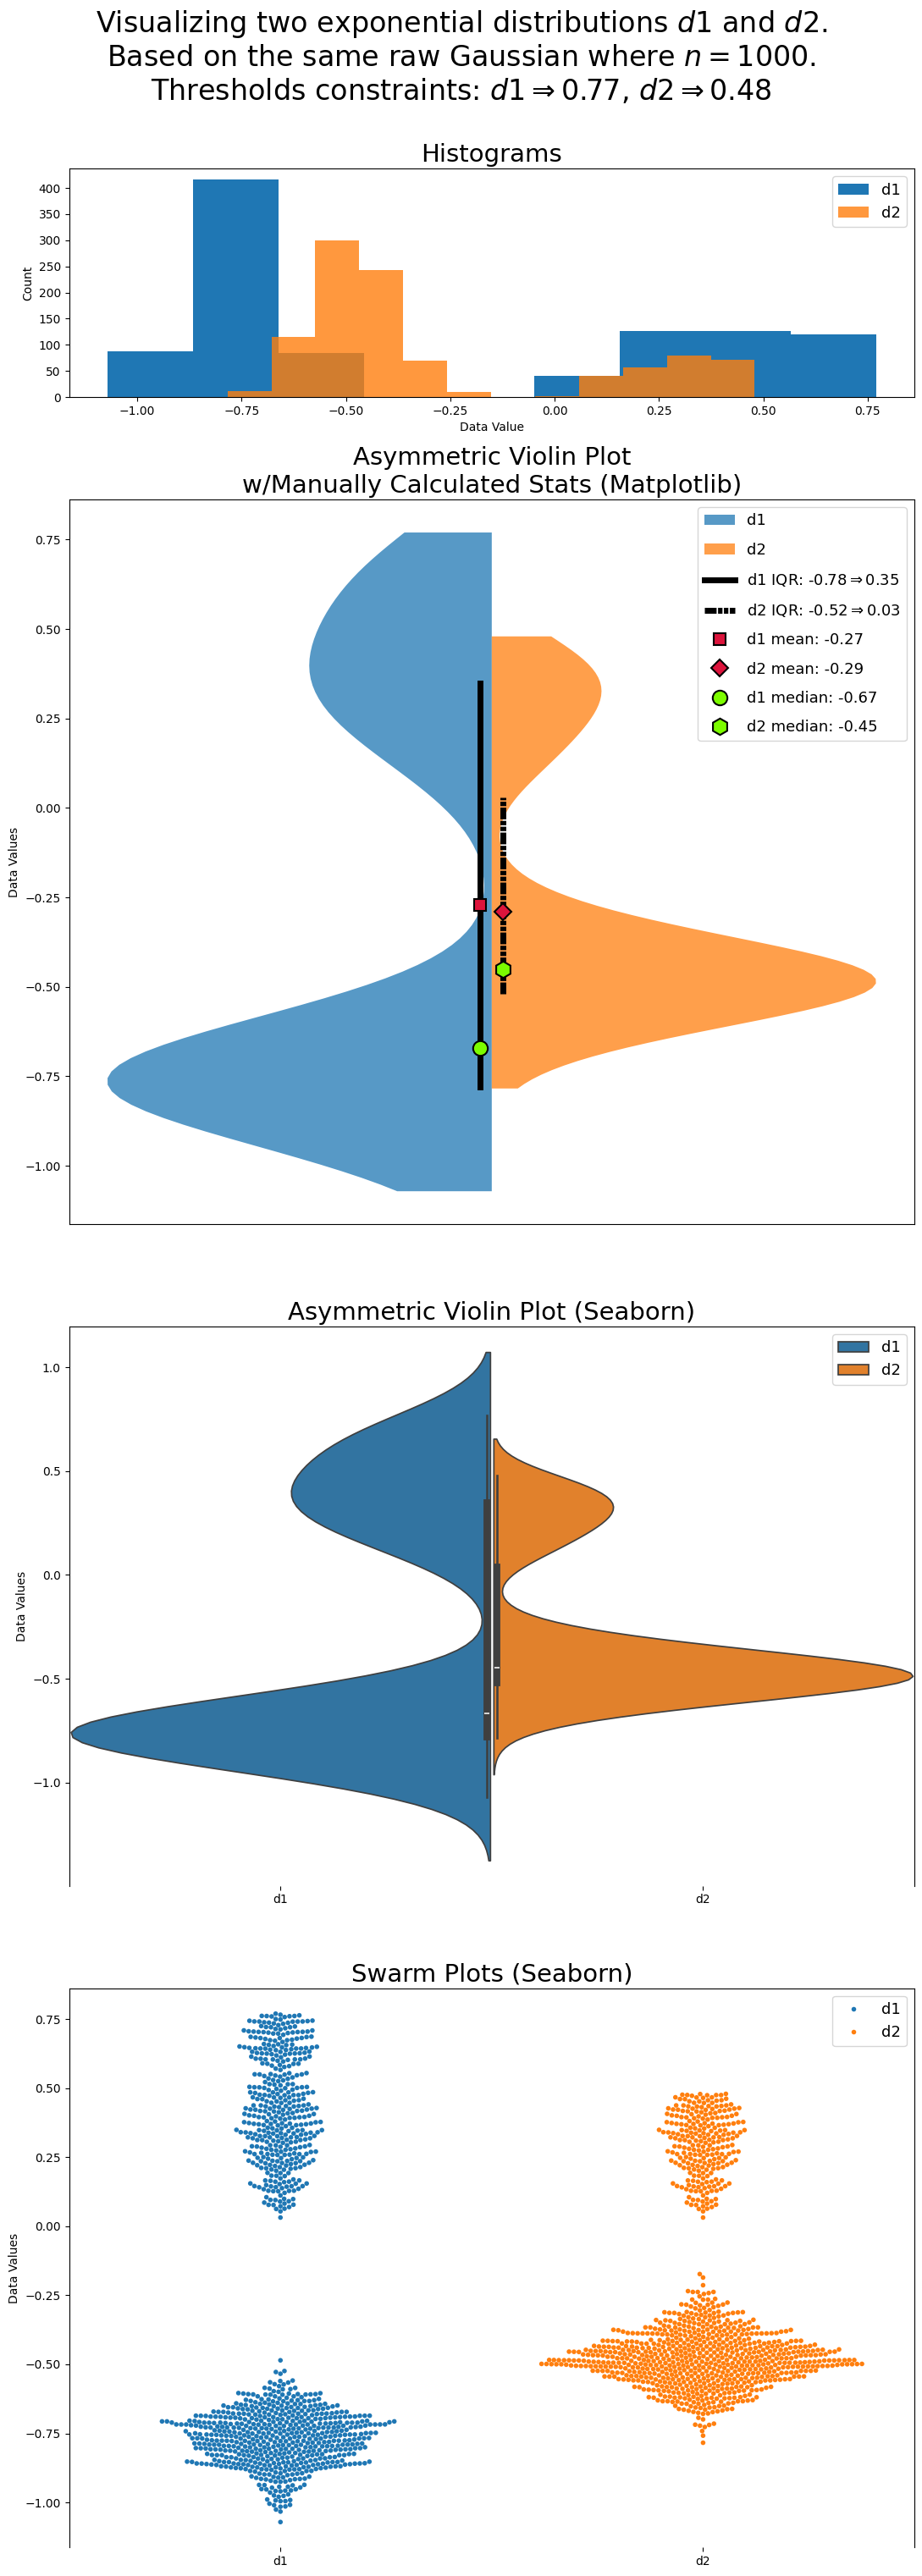

In [2]:
# # Establish datasets...
# Number of data points:
n = 1000

# Threshholds to compress data by:
thresh1 = np.round(random.uniform(0.2, 0.8), 2)
thresh2 = np.round(random.uniform(0.2, 0.8), 2)

# Raw data to base both changed datasets on:
raw = np.random.randn(n)

# Datasets to plot and compare:
d1 = np.exp(raw)
d2 = np.exp(raw)

# Limit data via thresholds and use formula to create
#  bimodal distributions. Should look like two mountains
#  with the sides chopped off:
d1[d1 > thresh1] = np.random.randn(sum(d1 > thresh1)) * 0.1 - thresh1
d2[d2 > thresh2] = np.random.randn(sum(d2 > thresh2)) * 0.1 - thresh2

# Get means and medians:
d1_mean = np.round(np.mean(d1), 2)
d2_mean = np.round(np.mean(d2), 2)
d1_median = np.round(np.median(d1), 2)
d2_median = np.round(np.median(d2), 2)

# ↓ ↓ ↓ Calculate IQR ↓ ↓ ↓ #
# Get rank transform data, normalize
#  with ceiling of 1:
d1_rank = stats.rankdata(d1) / n
d2_rank = stats.rankdata(d2) / n

# Find indices closest to .25 and
#  .75 of values:
d1_q1_ind = np.argmin((d1_rank - 0.25) ** 2)
d1_q3_ind = np.argmin((d1_rank - 0.75) ** 2)
d2_q1_ind = np.argmin((d2_rank - 0.25) ** 2)
d2_q3_ind = np.argmin((d2_rank - 0.75) ** 2)

# Find the values at 25% and 75%:
d1_iq_vals = np.round(d1[[d1_q1_ind, d1_q3_ind]], 2)
d2_iq_vals = np.round(d2[[d2_q1_ind, d2_q3_ind]], 2)

# Leaving us with the IQR:
d1_iqr = d1_iq_vals[1] - d1_iq_vals[0]
d2_iqr = d2_iq_vals[1] - d2_iq_vals[0]

# Or calculate IQR with SciPy method:
# d1_iqr = stats.iqr(d1)
# d2_iqr = stats.iqr(d2)
# ↑ ↑ ↑ Calculate IQR ↑ ↑ ↑ #

# Calculate bin size with FD Rule:
d1_h = 2 * d1_iqr * n ** (-1 / 3)
d1_k = int(np.ceil((max(d1) - min(d1)) / d1_h))
d2_h = 2 * d2_iqr * n ** (-1 / 3)
d2_k = int(np.ceil((max(d2) - min(d2)) / d2_h))

# Plot using `GridSpec()`:
fig = plt.figure(figsize=(11, 31))
gs = GridSpec(15, 1, figure=fig)
axes = [
    fig.add_subplot(gs[0:2]),
    fig.add_subplot(gs[2:7]),
    fig.add_subplot(gs[7:11]),
    fig.add_subplot(gs[11:15]),
]

# Increase legend/title font sizes for all plots:
legend_fontsize = 13
title_fontsize = 21

# HISTOGRAMS #
axes[0].hist(d1, bins=d1_k)
axes[0].hist(d2, bins=d2_k, alpha=0.8)
axes[0].set_title("Histograms", size=title_fontsize)
axes[0].legend(["d1", "d2"], fontsize=legend_fontsize)

# ↓ ↓ ↓ VIOLIN PLOTS ↓ ↓ ↓ #
d_both = [d1, d2]
for d_i in range(len(d_both)):
    d_viol = axes[1].violinplot(d_both[d_i], side=['low', 'high'][d_i], showextrema=False)
    d_viol['bodies'][0].set_alpha(0.75)

# Plot the IQRs as black bars:
axes[1].plot([0.9925, 0.9925], [d1_iq_vals[0], d1_iq_vals[1]], '-', lw=5, color='k')
axes[1].plot(
    [1.0075, 1.0075],
    [d2_iq_vals[0], d2_iq_vals[1]],
    ls=(0, (2, 0.25, 0.75, 0.25, 0.75, 0.25)),
    lw=5,
    color='k',
)

# Plot the means:
axes[1].plot(
    0.9925,
    d1_mean,
    's',
    markersize=10,
    markeredgewidth=1.5,
    markerfacecolor='crimson',
    markeredgecolor='k',
)
axes[1].plot(
    1.0075,
    d2_mean,
    'D',
    markersize=10,
    markeredgewidth=1.5,
    markerfacecolor='crimson',
    markeredgecolor='k',
)
# Plot the medians:
axes[1].plot(
    0.9925,
    d1_median,
    'o',
    markersize=12.5,
    markeredgewidth=1.5,
    markerfacecolor='lawngreen',
    markeredgecolor='k',
)
axes[1].plot(
    1.0075,
    d2_median,
    'h',
    markersize=14,
    markeredgewidth=1.5,
    markerfacecolor='lawngreen',
    markeredgecolor='k',
)
# Clear the deck:
axes[1].set_xticks([])
# Main violin plot legend labels:
axes[1].legend(
    [
        "d1",
        "d2",
        f"d1 IQR: {d1_iq_vals[0]}$\\Rightarrow${d1_iq_vals[1]}",
        f"d2 IQR: {d2_iq_vals[0]}$\\Rightarrow${d2_iq_vals[1]}",
        f"d1 mean: {d1_mean}",
        f"d2 mean: {d2_mean}",
        f"d1 median: {d1_median}",
        f"d2 median: {d2_median}",
    ],
    labelspacing=0.9,
    fontsize=legend_fontsize,
)
title_01 = "Asymmetric Violin Plot"
title_01 += "\nw/Manually Calculated Stats (Matplotlib)"
axes[1].set_title(title_01, size=title_fontsize)
# ↑ ↑ ↑ VIOLIN PLOTS ↑ ↑ ↑ #

# ↓ ↓ ↓ SEABORN PLOTS ↓ ↓ ↓ #
sns_data = {"d1": d1, "d2": d2}

axes[2].spines['bottom'].set_visible(False)
sns.violinplot(data=sns_data, ax=axes[2], orient='v', split=True, gap=-0.24, legend='full')
axes[2].set_title("Asymmetric Violin Plot (Seaborn)", size=title_fontsize)
axes[2].legend(fontsize=legend_fontsize)

axes[3].spines['bottom'].set_visible(False)
sns.swarmplot(data=sns_data, ax=axes[3], orient='v', size=4, legend='full')
axes[3].set_title("Swarm Plots (Seaborn)", size=title_fontsize)
axes[3].legend(fontsize=legend_fontsize)

for i in range(len(axes)):
    if i == 0:
        axes[i].set_xlabel("Data Value")
        axes[i].set_ylabel("Count")
    else:
        axes[i].set_ylabel("Data Values")
# ↑ ↑ ↑ SEABORN PLOTS ↑ ↑ ↑ #

sup_title = "Visualizing two exponential distributions $d1$ and $d2$."
sup_title += f"\nBased on the same raw Gaussian where $n={n}$."
sup_title += f"\nThresholds constraints: $d1\\Rightarrow{thresh1}$, $d2\\Rightarrow{thresh2}$\n\n"
plt.suptitle(sup_title, size=24)

plt.tight_layout()
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px #5EDC1F; width: 75%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px magenta; width: 65%;">

<hr style="height: 0; box-shadow: 0 0 5px 4px gold; width: 55%;">

<font size=2>

_Andrew Blais, Boston, Massachusetts_

GitHub: https://github.com/andrewblais

Website/Python Web Development Porfolio: https://www.andrewblais.dev/

</font>